https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
import matplotlib
matplotlib.style.use('ggplot')

In [5]:
X = np.array([5, 7, 9, 11, 13, 15])
y = np.array([11, 14, 20, 24, 29, 31])

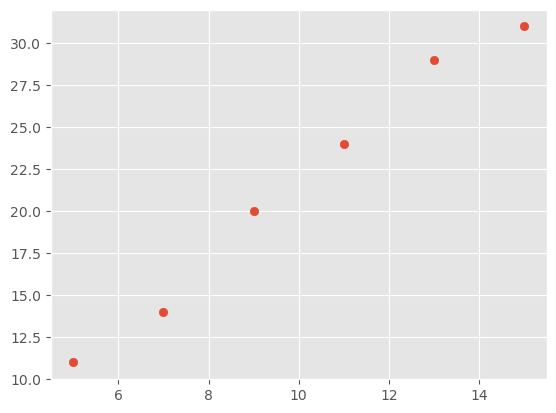

In [6]:
plt.scatter(X,y)
plt.show()

In [7]:
np.corrcoef(X,y)

array([[1.        , 0.99322298],
       [0.99322298, 1.        ]])

Check the dimension of the array - must be 1D

In [8]:
y.shape

(6,)

In [9]:
y.ndim

1

In [10]:
X.shape

(6,)

In [11]:
X = X.reshape(-1,1)
X

array([[ 5],
       [ 7],
       [ 9],
       [11],
       [13],
       [15]])

In [12]:
from sklearn.linear_model import LinearRegression
LinearRegression?

Init signature:
LinearRegression(
    *,
    fit_intercept=True,
    copy_X=True,
    n_jobs=None,
    positive=False,
)
Docstring:     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, default=None
    The number of jobs to use for the computation. This will only provide
    speedup in case of sufficiently large problems, that is if firstly
    `n_targets > 1` and secondly `X` is sparse or if `positive` is set
    to `True`. ``None`` means 1 unless in a
    :obj:`

In [13]:
model = LinearRegression()

In [14]:
model.fit(X,y)

LinearRegression()

In [15]:
model.coef_ # slope

array([2.12857143])

In [16]:
model.intercept_

0.2142857142857153

In [17]:
w0 = model.intercept_
w1 = model.coef_[0]

predictions = w0 + np.dot(w1,X).reshape(1,-1)
predictions


array([[10.85714286, 15.11428571, 19.37142857, 23.62857143, 27.88571429,
        32.14285714]])

In [18]:
pred = model.predict(X)
pred

array([10.85714286, 15.11428571, 19.37142857, 23.62857143, 27.88571429,
       32.14285714])

In [19]:
pred == predictions

array([[ True,  True,  True,  True,  True,  True]])

In [20]:
# EVALUATION

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2




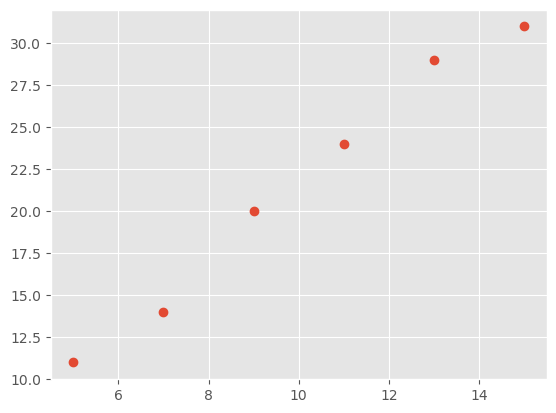

In [21]:
plt.plot(X,y,'o')


# MULTIPLE LINEAR REGRESSION

In [22]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [35]:
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [36]:
X = data
y = diabetes.target
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X,y)

LinearRegression()

In [27]:
r_squared = lr.score(X,y)
r_squared

0.5177484222203499

The R-squared score (also called the coefficient of determination, 
𝑅
2
R 
2
 ) is a statistical measure that represents the proportion of the variance in the target variable (dependent variable) that is explained by the features (independent variables) in a regression model.

In the Context of the Diabetes Dataset:
The 10 feature columns (age, BMI, blood pressure, and six blood serum measurements) represent different factors that may influence the progression of diabetes.
The target variable represents the disease progression one year after baseline.
When you perform linear regression using these 10 features to predict the target (diabetes progression), the R-squared score will tell you how well the model explains the variance in the target variable.

In [28]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
adjusted_r_squared

0.5065592904853232

In [29]:
lr.coef_

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

In [30]:
lr.intercept_

152.13348416289597

Text(0, 0.5, 'Coefficient')

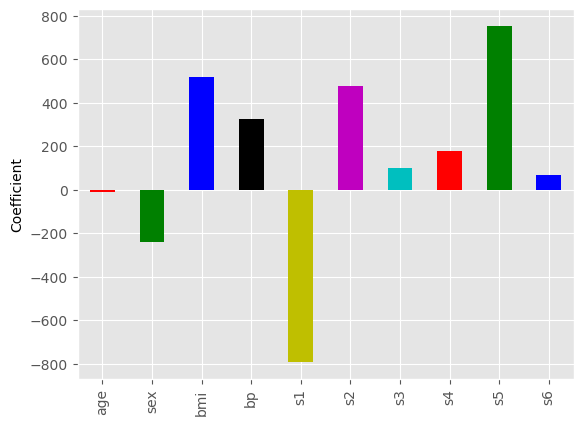

In [31]:
coef=pd.Series(lr.coef_ , index=diabetes.feature_names)
coef.plot(kind='bar', color = list('rgbkymc'))
plt.ylabel('Coefficient')

In [32]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [37]:
## #load mtcars
dfcars=pd.read_csv("mtcars.csv")
dfcars=dfcars.rename(columns={"Unnamed: 0":"name"})
dfcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


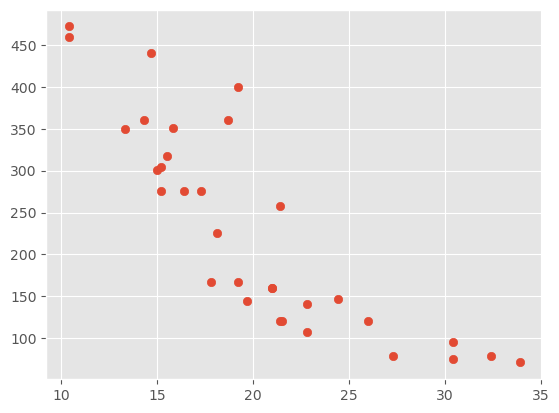

In [47]:
plt.scatter(dfcars['mpg'], dfcars['disp'])


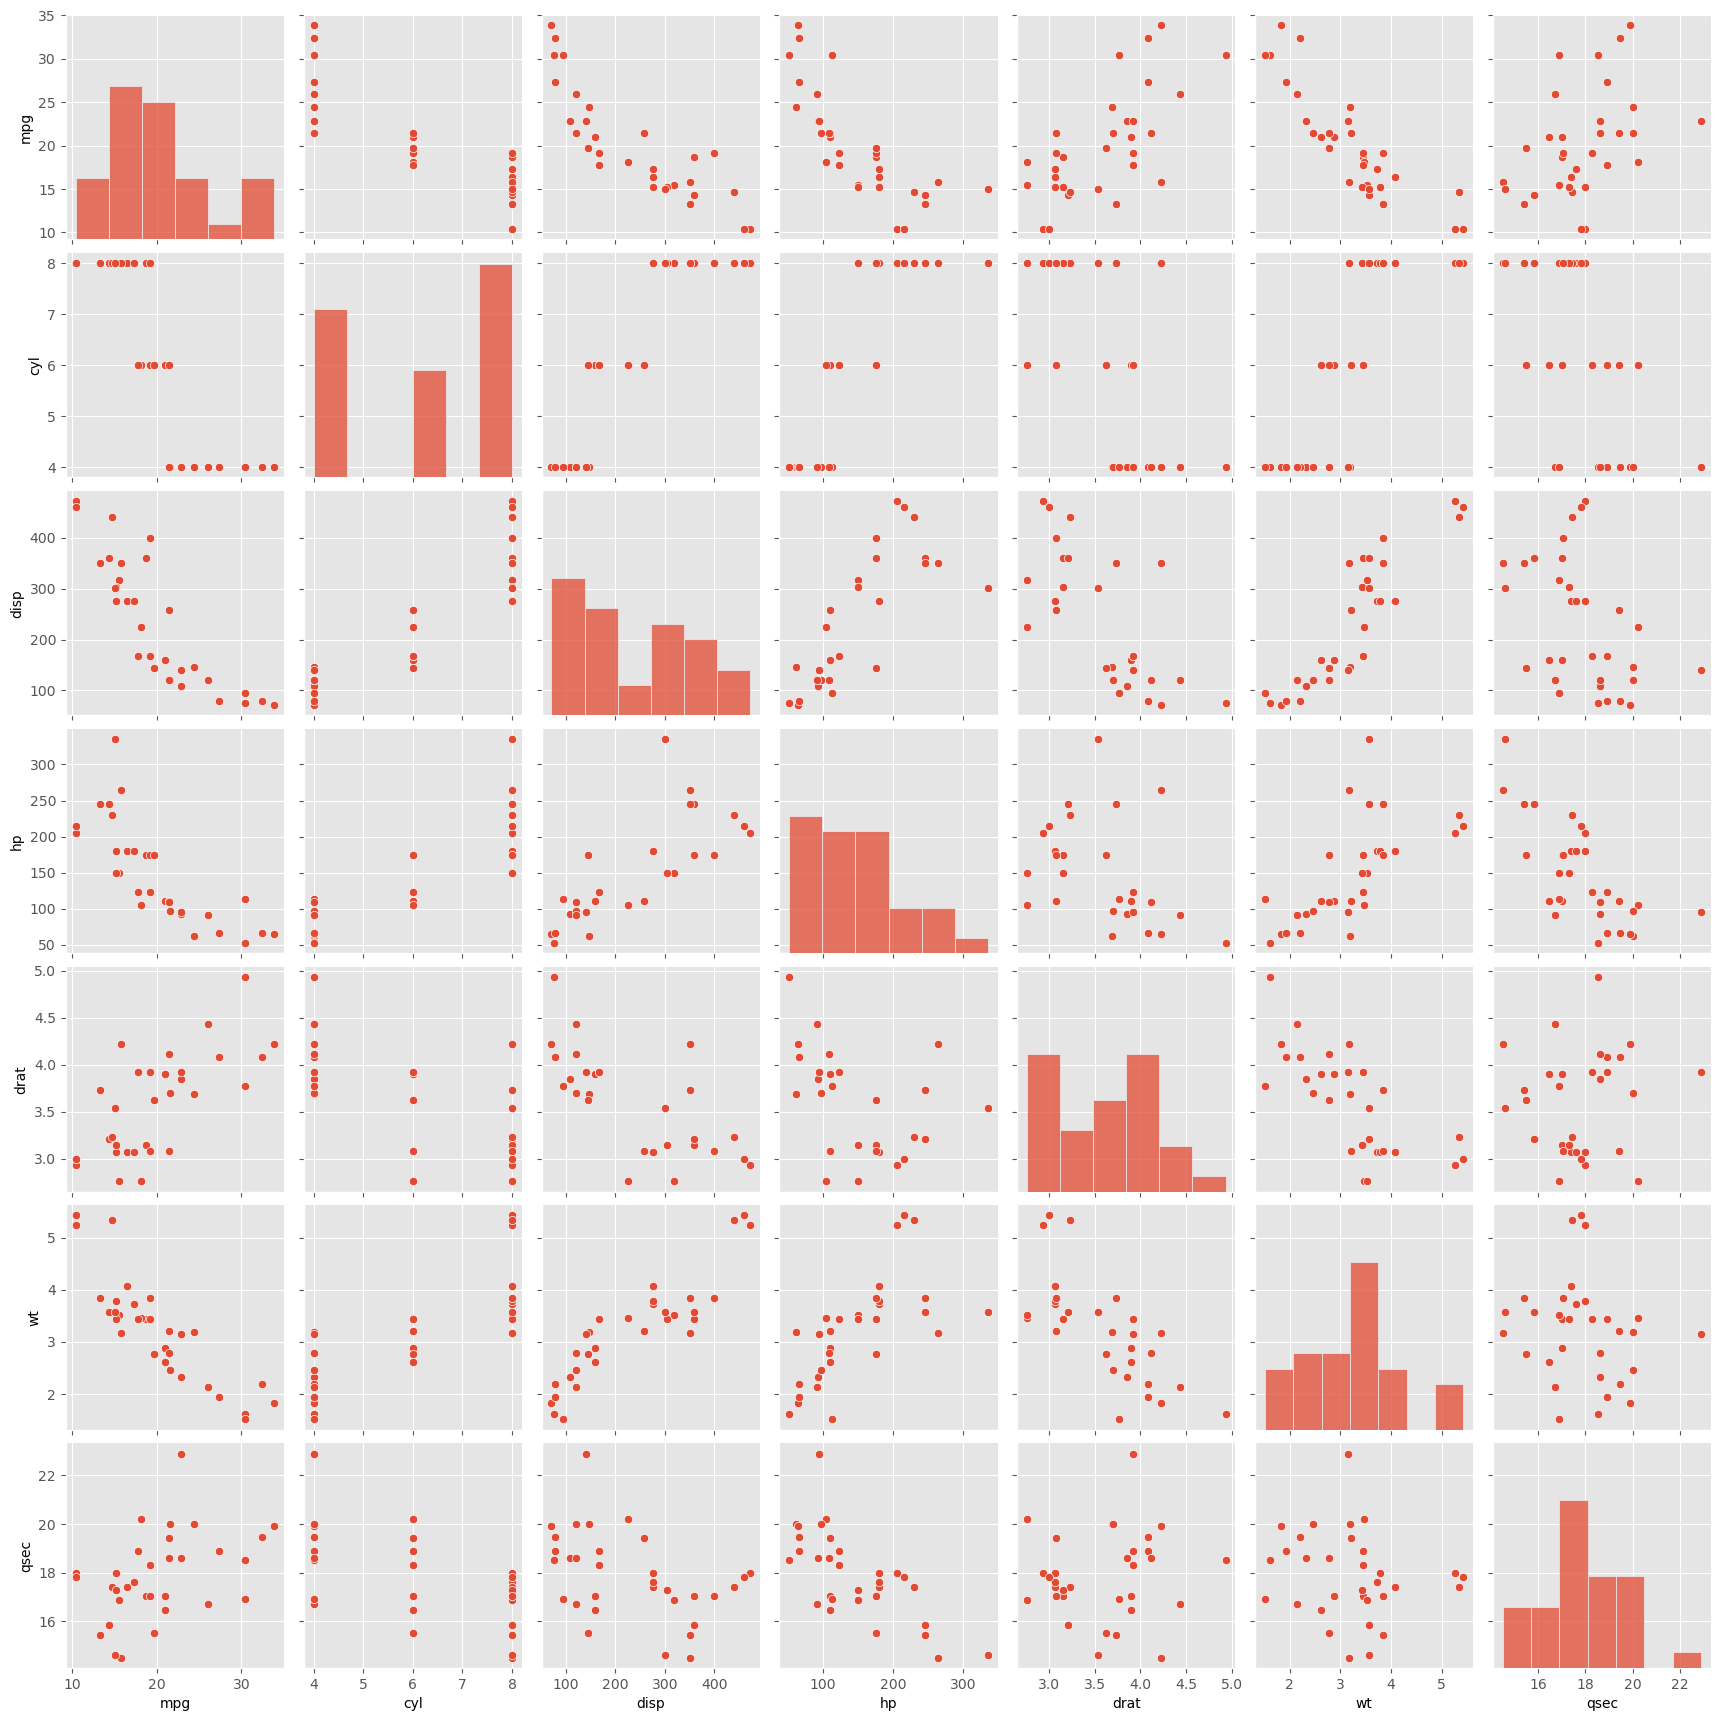

In [52]:
import seaborn as sns
dfcars_reduced = dfcars.drop(columns=['name', 'gear', 'carb', 'am', 'vs'])
sns.pairplot(dfcars_reduced)

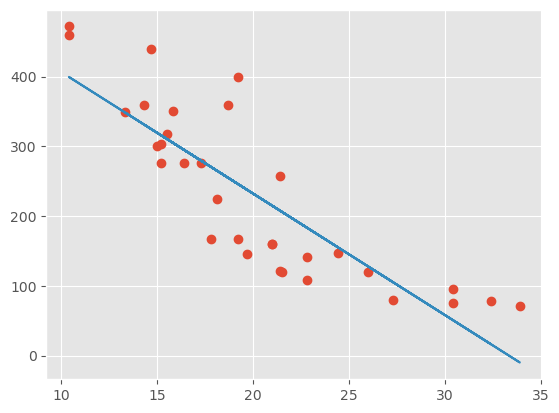

mse 4191.269330664532, r2 0.7183433404897299, rmse 64.74001336626779, coefficient [-17.42912167], intercept 580.8838225585018, score 0.7183433404897299


In [90]:
# Function to return the linear regression of X and y with the mean squared error and R2
def cars_lr(X, y):
  model = LinearRegression()
  X = X.values.reshape(-1,1)
  model.fit(X, y)
  plt.plot(X, y,'o')
  pred = model.predict(X)
  mse_calc = mse(y, pred)
  r2_calc = r2(y, pred)
  rmse_calc = np.sqrt(mse(y,pred))
  return mse_calc, r2_calc, rmse_calc, pred, model.coef_ , model.intercept_, model.score(X,y)


X = dfcars['mpg']
# Doing a linear regression with wt variable
mse_calc, r2_calc, rmse_calc, pred, coef, intercept, score  = cars_lr(dfcars['mpg'], dfcars['disp'])
plt.plot(X, pred)
plt.show()
print(f'mse {mse_calc}, r2 {r2_calc}, rmse {rmse_calc}, coefficient {coef}, intercept {intercept}, score {score}')

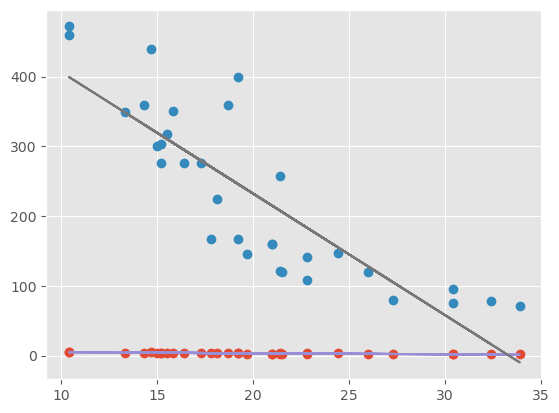

 2 variable LINEAR REGRESSION mse 2095.7492842889988, r2 0.7355880670739972, rmse 45.77935434547978, coefficient [[ -0.14086197]
 [-17.42912167]], intercept [  6.04725501 580.88382256], score 0.7355880670739972


In [124]:
# Doing a linear regression with wt variable and displacement
y_2 = dfcars[['wt', 'disp']]
mse_calc, r2_calc, rmse_calc, pred, coef, intercept, score  = cars_lr(X, y_2)
plt.plot(X, pred)
plt.show()
print(f' 2 variable LINEAR REGRESSION mse {mse_calc}, r2 {r2_calc}, rmse {rmse_calc}, coefficient {coef}, intercept {intercept}, score {score}')

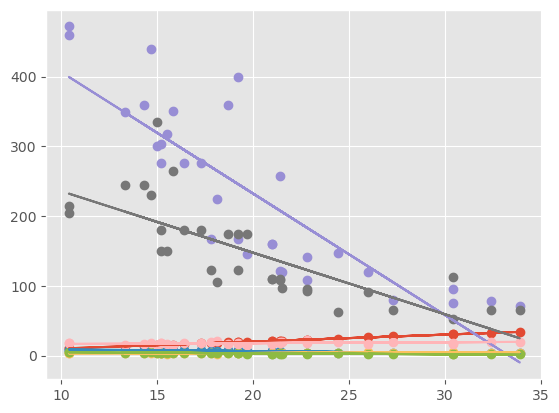

 MULTIPLE VARIABLE mse 857.932938108829, r2 0.6341549955588331, rmse 29.290492281776846, coefficient [[  1.        ]
 [ -0.25251495]
 [-17.42912167]
 [ -8.82973099]
 [  0.06042994]
 [ -0.14086197]
 [  0.12413656]], intercept [  0.          11.26068318 580.88382256 324.08231421   2.38248715
   6.04725501  15.35476891], score 0.6341549955588331


In [125]:

# Doing a linear regression with wt variable and displacement
mse_calc, r2_calc, rmse_calc, pred, coef, intercept, score  = cars_lr(X, dfcars_reduced)
plt.plot(X, pred)
plt.show()
print(f' MULTIPLE VARIABLE mse {mse_calc}, r2 {r2_calc}, rmse {rmse_calc}, coefficient {coef}, intercept {intercept}, score {score}')

In [121]:
coef
coef.shape
coef1 = pd.Series(coef.flatten(), index = dfcars_reduced.columns)
#coef1 = pd.Series(coef)

Text(0, 0.5, 'Coefficient')

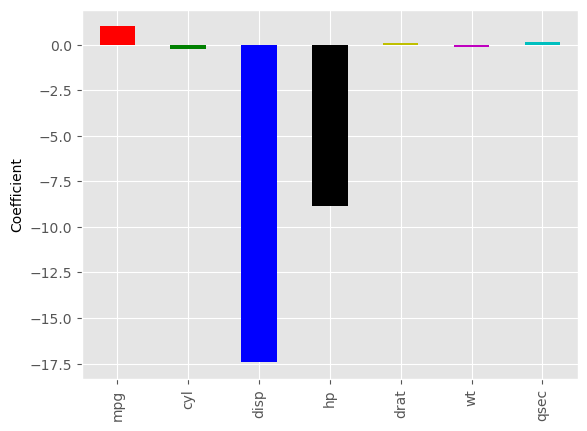

In [122]:

coef1.plot(kind='bar', color = list('rgbkymc'))
plt.ylabel('Coefficient')

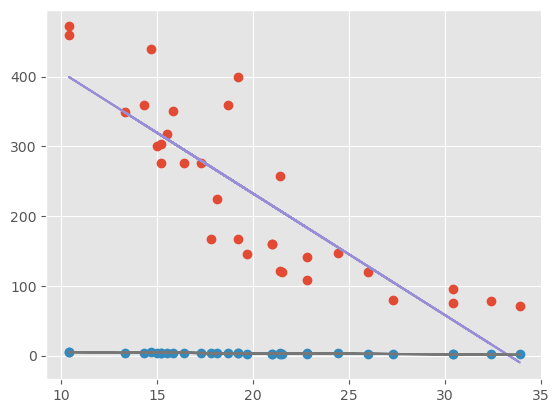

 MULTIPLE VARIABLE mse 2095.7492842889988, r2 0.7355880670739972, rmse 45.77935434547978, coefficient [[-17.42912167]
 [ -0.14086197]], intercept [580.88382256   6.04725501], score 0.7355880670739972


In [140]:
dfcars_reduced2 = dfcars[['disp', 'wt']]
mse_calc, r2_calc, rmse_calc, pred, coef, intercept, score  = cars_lr(X, dfcars_reduced2)
plt.plot(X, pred)
plt.show()
print(f' MULTIPLE VARIABLE mse {mse_calc}, r2 {r2_calc}, rmse {rmse_calc}, coefficient {coef}, intercept {intercept}, score {score}')